In [1]:
import glaes as gl
import geokit as gk
import numpy as np
import gdal
from glob import glob
import json
from collections import OrderedDict
from os.path import basename

In [2]:
#reg = gk.RegionMask.load("../../glaes/testing/data/aachenShapefile.shp")
area = gk.Extent((4279670,3350205,4381733,3439473), srs=3035).box

area.TransformTo(gk.srs.loadSRS(4326))
deu, trash = gk.vector.extractFeature(r"D:\Data\regions\gadm\DEU_adm0.shp", 0)
area = area.Intersection(deu)
reg = gk.RegionMask.load(area)
print(reg.mask.shape)

(897, 1040)


Mapping 'roads-main' to 'roads_main_proximity'
Mapping 'roads-secondary' to 'roads_secondary_proximity'
Mapping 'urban' to 'settlements_urban_proximity'
Mapping 'rural' to 'settlements_rural_proximity'
Mapping 'rivers' to 'river_proximity'
Mapping 'lakes' to 'lake_proximity'
Mapping 'protected_birds' to 'protected_bird_proximity'
Mapping 'protected_habitats' to 'protected_habitat_proximity'


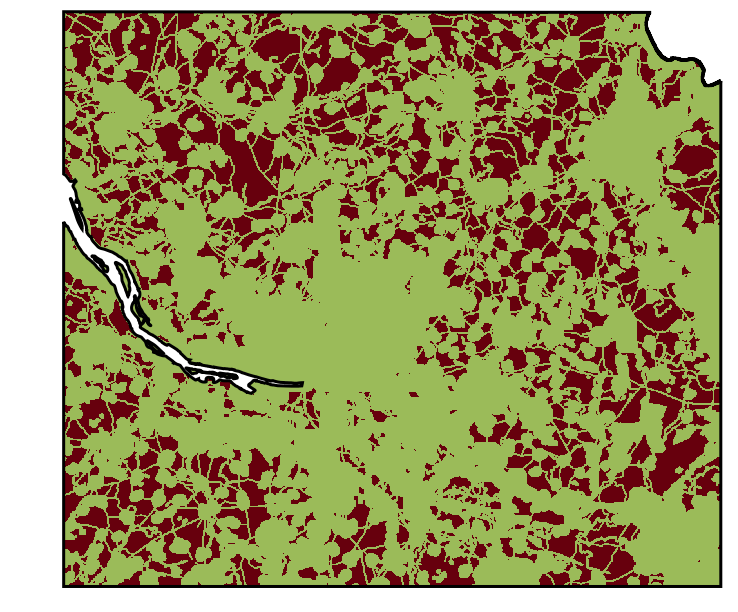

In [4]:

ec = gl.ExclusionCalculator(reg)

ec.excludePrior("roads-main", (None,100) )
ec.excludePrior("roads-secondary", (None,100) )
ec.excludePrior("urban", (0,500))
ec.excludePrior("rural", (0,500) )
ec.excludePrior("rivers" , (None,0) )
ec.excludePrior("lakes" , (None,0) )
ec.excludePrior("protected_birds", (None,0) )
ec.excludePrior("protected_habitats", (None,0) )
ec.draw(goodColor=(103/255,0,13/255), excludedColor=(155/255,187/255,89/255))#output="exclude_%d.png"%5)

In [3]:
ec = gl.ExclusionCalculator(reg)

ec.excludePrior("roads-main" )
ec.excludePrior("roads-secondary" )
ec.draw(output="exclude_%d.png"%1)


Mapping 'roads-main' to 'roads_main_proximity'
Mapping 'roads-secondary' to 'roads_secondary_proximity'


In [4]:
ec = gl.ExclusionCalculator(reg)

ec.excludePrior("urban" )
ec.excludePrior("rural" )
ec.draw(output="exclude_%d.png"%2)


Mapping 'urban' to 'settlements_urban_proximity'
Mapping 'rural' to 'settlements_rural_proximity'


In [5]:
ec = gl.ExclusionCalculator(reg)

ec.excludePrior("rivers" )
ec.excludePrior("lakes" )
ec.draw(output="exclude_%d.png"%3)


Mapping 'rivers' to 'river_proximity'
Mapping 'lakes' to 'lake_proximity'


In [14]:
ec = gl.ExclusionCalculator(reg)

ec.excludePrior("protected_birds" )
ec.excludePrior("protected_habitats" )
ec.draw(output="exclude_%d.png"%4)


Mapping 'protected_birds' to 'protected_bird_proximity'
Mapping 'protected_habitats' to 'protected_habitat_proximity'


In [5]:
ec.areaAvailable

2738290000.0

In [ ]:
ec = gl.Priors.airfield_proximity

In [ ]:
ec = gl.Priors.airfield_proximity

In [ ]:
ec = gl.Priors.airports_proximity

In [ ]:
ec = gl.Priors.airports_proximity

In [ ]:
ec = gl.Priors.airports_proximity

In [72]:
keys = list(gl.Priors.europe.__dict__.keys())
for k in filter(lambda x: "Distance" in x, keys): print('"%s",'%k)

"connectionDistance",
"accessDistance",


In [51]:
p = gl.Priors.europe.agricultureProximity

valueMap = OrderedDict()
for i in range(len(p.edges)):
    valueMap["%d"%i] = "<=%0.2f"%p.edges[i]

#valueMap["0"] = "0"
valueMap["254"] = ">%0.2f"%p.edges[0]
vm = json.dumps(valueMap)

print(p.unit)
print(p.__doc__)
print(vm)


ds = gdal.Open(p.path,1)
ds.SetMetadataItem("VALUE_MAP",vm)
ds.SetMetadataItem("UNIT",p.unit)
ds.SetMetadataItem("DESCRIPTION",p.__doc__)
ds = None


meters
Precalculated pixels which are further than X meters from the closest road
{"0": "<=20000.00", "1": "<=19000.00", "2": "<=18000.00", "3": "<=17000.00", "4": "<=16000.00", "5": "<=15000.00", "6": "<=14000.00", "7": "<=13000.00", "8": "<=12000.00", "9": "<=11000.00", "10": "<=10000.00", "11": "<=9000.00", "12": "<=8000.00", "13": "<=7000.00", "14": "<=6000.00", "15": "<=5000.00", "16": "<=4000.00", "17": "<=3500.00", "18": "<=3000.00", "19": "<=2500.00", "20": "<=2000.00", "21": "<=1500.00", "22": "<=1250.00", "23": "<=1000.00", "24": "<=750.00", "25": "<=500.00", "26": "<=250.00", "27": "<=0.00", "254": ">20000.00"}


In [62]:
# Proximity
keys = [
"riverProximity",
"mixedWoodlandProximity",
"mineProximity",
"birdProximity",
"airfieldProximity",
"habitatProximity",
"airportProximity",
"mainRoadProximity",
"parkProximity",
"wetlandProximity",
"urbanProximity",
"ruralProximity",
"powerLineProximity",
"lakeProximity",
"biosphereProximity",
"secondaryRoadProximity",
"industrialProximity",
"agricultureProximity",
"reserveProximity",
"landscapeProximity",
"wildernessProximity",
"deciduousWoodlandProximity",
"coniferousWoodlandProximity",
"naturalMonumentProximity",
"oceanProximity",
"railwayProximity",]


for k in keys:
    p = getattr(gl.Priors.europe,k)
    
    valueMap = OrderedDict()
    for i in range(len(p.edges)):
        valueMap["%d"%i] = "<=%0.2f"%p.edges[i]

    valueMap["0"] = "0"
    valueMap["254"] = ">%0.2f"%p.edges[-1]
    vm = json.dumps(valueMap)

    print(k)
    print(p.__doc__)
    print(vm)
    print("")


    ds = gdal.Open(p.path,1)
    ds.SetMetadataItem("VALUE_MAP",vm)
    ds.SetMetadataItem("UNIT",p.unit)
    ds.SetMetadataItem("DESCRIPTION",p.__doc__)
    ds.SetMetadataItem("NOTES","A value of 0 means the pixel is identified as being internal to the indicated item")
    ds = None



riverProximity
Precalculated pixels within X meters from rivers
{"0": "0", "1": "<=200.00", "2": "<=400.00", "3": "<=600.00", "4": "<=800.00", "5": "<=1000.00", "6": "<=1200.00", "7": "<=1400.00", "8": "<=1600.00", "9": "<=1800.00", "10": "<=2000.00", "11": "<=2200.00", "12": "<=2400.00", "13": "<=2600.00", "14": "<=2800.00", "15": "<=3000.00", "254": ">3000.00"}

mixedWoodlandProximity
Precalculated pixels within X meters from mixed-forest woodlands
{"0": "0", "1": "<=100.00", "2": "<=200.00", "3": "<=300.00", "4": "<=400.00", "5": "<=500.00", "6": "<=600.00", "7": "<=700.00", "8": "<=800.00", "9": "<=900.00", "10": "<=1000.00", "254": ">1000.00"}

mineProximity
Precalculated pixels within X meters from mining area
{"0": "0", "1": "<=100.00", "2": "<=200.00", "3": "<=300.00", "4": "<=400.00", "5": "<=500.00", "6": "<=600.00", "7": "<=700.00", "8": "<=800.00", "9": "<=900.00", "10": "<=1000.00", "254": ">1000.00"}

birdProximity
Precalculated pixels within X meters from bird sanctuarie

In [68]:
# Proximity
keys = [#"elevationThreshold",
"windspeedThresholdAt50m",
#"slopeThreshold",
"windspeedThresholdAt100m",
"ghiThreshold",
#"northFacingSlopeThreshold",
"dniThreshold",]


for k in keys:
    p = getattr(gl.Priors.europe,k)
    
    valueMap = OrderedDict()
    for i in range(len(p.edges)):
        valueMap["%d"%i] = "<=%0.2f"%p.edges[i]

    #valueMap["0"] = "0"
    valueMap["254"] = ">%0.2f"%p.edges[-1]
    vm = json.dumps(valueMap)

    print(k)
    print(p.__doc__)
    print(vm)
    print("")


    ds = gdal.Open(p.path,1)
    ds.SetMetadataItem("VALUE_MAP",vm)
    ds.SetMetadataItem("UNIT",p.unit)
    ds.SetMetadataItem("DESCRIPTION",p.__doc__)
    ds.SetMetadataItem("NOTES","None")
    ds = None



windspeedThresholdAt50m
Precalculated pixels with an annual average windspeed measured at 50m BELOW X m/s
{"0": "<=0.00", "1": "<=0.25", "2": "<=0.50", "3": "<=0.75", "4": "<=1.00", "5": "<=1.25", "6": "<=1.50", "7": "<=1.75", "8": "<=2.00", "9": "<=2.25", "10": "<=2.50", "11": "<=2.75", "12": "<=3.00", "13": "<=3.25", "14": "<=3.50", "15": "<=3.75", "16": "<=4.00", "17": "<=4.25", "18": "<=4.50", "19": "<=4.75", "20": "<=5.00", "21": "<=5.25", "22": "<=5.50", "23": "<=5.75", "24": "<=6.00", "25": "<=6.25", "26": "<=6.50", "27": "<=6.75", "28": "<=7.00", "29": "<=7.25", "30": "<=7.50", "31": "<=7.75", "32": "<=8.00", "33": "<=8.25", "34": "<=8.50", "35": "<=8.75", "36": "<=9.00", "37": "<=9.25", "38": "<=9.50", "39": "<=9.75", "40": "<=10.00", "41": "<=10.25", "42": "<=10.50", "43": "<=10.75", "44": "<=11.00", "45": "<=11.25", "46": "<=11.50", "47": "<=11.75", "48": "<=12.00", "49": "<=12.25", "50": "<=12.50", "51": "<=12.75", "52": "<=13.00", "53": "<=13.25", "54": "<=13.50", "55": "<

In [70]:
# Proximity
keys = ["elevationThreshold",
#"windspeedThresholdAt50m",
"slopeThreshold",
#"windspeedThresholdAt100m",
#"ghiThreshold",
"northFacingSlopeThreshold",
#"dniThreshold",
       ]


for k in keys:
    p = getattr(gl.Priors.europe,k)
    
    valueMap = OrderedDict()
    for i in range(len(p.edges)):
        valueMap["%d"%i] = ">=%0.2f"%p.edges[i]

    #valueMap["0"] = "0"
    valueMap["254"] = "<%0.2f"%p.edges[-1]
    vm = json.dumps(valueMap)

    print(k)
    print(p.__doc__)
    print(vm)
    print("")


    ds = gdal.Open(p.path,1)
    ds.SetMetadataItem("VALUE_MAP",vm)
    ds.SetMetadataItem("UNIT",p.unit)
    ds.SetMetadataItem("DESCRIPTION",p.__doc__)
    ds.SetMetadataItem("NOTES","None")
    ds = None

elevationThreshold
Precalculated pixels where the elevation is above X meters
{"0": ">=2000.00", "1": ">=1991.67", "2": ">=1983.33", "3": ">=1975.00", "4": ">=1966.67", "5": ">=1958.33", "6": ">=1950.00", "7": ">=1941.67", "8": ">=1933.33", "9": ">=1925.00", "10": ">=1916.67", "11": ">=1908.33", "12": ">=1900.00", "13": ">=1891.67", "14": ">=1883.33", "15": ">=1875.00", "16": ">=1866.67", "17": ">=1858.33", "18": ">=1850.00", "19": ">=1841.67", "20": ">=1833.33", "21": ">=1825.00", "22": ">=1816.67", "23": ">=1808.33", "24": ">=1800.00", "25": ">=1791.67", "26": ">=1783.33", "27": ">=1775.00", "28": ">=1766.67", "29": ">=1758.33", "30": ">=1750.00", "31": ">=1741.67", "32": ">=1733.33", "33": ">=1725.00", "34": ">=1716.67", "35": ">=1708.33", "36": ">=1700.00", "37": ">=1691.67", "38": ">=1683.33", "39": ">=1675.00", "40": ">=1666.67", "41": ">=1658.33", "42": ">=1650.00", "43": ">=1641.67", "44": ">=1633.33", "45": ">=1625.00", "46": ">=1616.67", "47": ">=1608.33", "48": ">=1600.00", 

In [74]:
# Proximity
keys = [
    "connectionDistance",
    "accessDistance",
]


for k in keys:
    p = getattr(gl.Priors.europe,k)
    
    valueMap = OrderedDict()
    for i in range(len(p.edges)):
        valueMap["%d"%i] = ">%0.2f"%p.edges[i]

    #valueMap["0"] = "0"
    valueMap["254"] = ">%0.2f"%p.edges[0]
    vm = json.dumps(valueMap)

    print(k)
    print(p.__doc__)
    print(vm)
    print("")


    ds = gdal.Open(p.path,1)
    ds.SetMetadataItem("VALUE_MAP",vm)
    ds.SetMetadataItem("UNIT",p.unit)
    ds.SetMetadataItem("DESCRIPTION",p.__doc__)
    ds.SetMetadataItem("NOTES","None")
    ds = None


connectionDistance
Precalculated pixels which are further than X meters from the closest grid connection
{"0": ">50000.00", "1": ">45000.00", "2": ">40000.00", "3": ">35000.00", "4": ">30000.00", "5": ">25000.00", "6": ">20000.00", "7": ">18000.00", "8": ">16000.00", "9": ">14000.00", "10": ">12000.00", "11": ">11000.00", "12": ">10000.00", "13": ">9000.00", "14": ">8000.00", "15": ">7000.00", "16": ">6000.00", "17": ">5000.00", "18": ">4000.00", "19": ">3500.00", "20": ">3000.00", "21": ">2500.00", "22": ">2000.00", "23": ">1500.00", "24": ">1250.00", "25": ">1000.00", "26": ">750.00", "27": ">500.00", "28": ">250.00", "29": ">0.00", "254": ">50000.00"}

accessDistance
Precalculated pixels which are further than X meters from the closest road
{"0": ">20000.00", "1": ">19000.00", "2": ">18000.00", "3": ">17000.00", "4": ">16000.00", "5": ">15000.00", "6": ">14000.00", "7": ">13000.00", "8": ">12000.00", "9": ">11000.00", "10": ">10000.00", "11": ">9000.00", "12": ">8000.00", "13": ">70

In [4]:
for f in glob(r"C:\Users\s.ryberg\PHD\repos\glaes\data\europe\*.tif"):
    ds = gdal.Open(f,1)
    print(basename(f))
    print( ds.SetMetadataItem("GLAES_PRIOR","YES") )

access_distance.tif
0
agriculture_proximity.tif
0
airfield_proximity.tif
0
airports_proximity.tif
0
connection_distance.tif
0
dni_threshold.tif
0
elevation_threshold.tif
0
ghi_threshold.tif
0
industrial_proximity.tif
0
lake_proximity.tif
0
mining_proximity.tif
0
north_facing_slope_threshold.tif
0
ocean_proximity.tif
0
power_lines_proximity.tif
0
protected_biosphere_proximity.tif
0
protected_bird_proximity.tif
0
protected_habitat_proximity.tif
0
protected_landscape_proximity.tif
0
protected_natural_monument_proximity.tif
0
protected_park_proximity.tif
0
protected_reserve_proximity.tif
0
protected_wilderness_proximity.tif
0
railway_proximity.tif
0
river_proximity.tif
0
roads_main_proximity.tif
0
roads_secondary_proximity.tif
0
settlements_rural_proximity.tif
0
settlements_urban_proximity.tif
0
slope_threshold.tif
0
wetland_proximity.tif
0
windspeed_100m_threshold.tif
0
windspeed_50m_threshold.tif
0
woodland_coniferous_proximity.tif
0
woodland_deciduous_proximity.tif
0
woodland_mixed_prox

In [5]:
from shapely.geometry import Polygon

In [10]:
p = Polygon([[0,0], [0,1], [1,1], [1,0], [0,0], ]).wkt

In [7]:
import gdal

In [8]:
import ogr

In [9]:
ogr.Geometry.GetPoints?

In [12]:
g = ogr.CreateGeometryFromWkt(p)

In [20]:
np.arctan(0.105)*180/np.pi

5.9940929491084702